In [1]:
import netCDF4
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

## Cmap

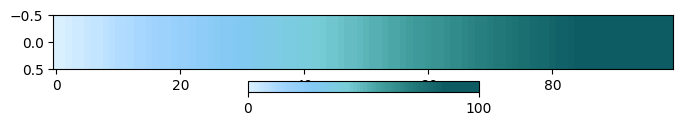

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Définir les couleurs de la palette en RGB
colors = ["#D9F0FF","#A3D5FF", "#83C9F4", "#78cdd7ff","#44a1a0ff","#247B7B", "#0d5c63ff", "#0D5C63"]

# Définir les positions normalisées pour chaque couleur
positions = [0.0, 0.5, 1.0]

# Créer la colormap
cmap = LinearSegmentedColormap.from_list('sequential_colormap', colors, N=70)

# Créer une figure pour visualiser la colormap
fig, ax = plt.subplots(figsize=(8, 1))
cax = ax.imshow(np.linspace(0, 100, 100).reshape(1, 100), cmap=cmap, aspect='auto', vmin=0, vmax=100)
fig.colorbar(cax, orientation='horizontal', ticks=[0, 100])

# Afficher la figure
plt.show()

# Précipitations maximales par mois

https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=form

In [3]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'sis-european-risk-extreme-precipitation-indicators',
    {
        'format': 'zip',
        'variable': 'maximum_1_day_precipitation',
        'spatial_coverage': 'europe',
        'product_type': 'e_obs',
        'temporal_aggregation': 'monthly',
        'period': [
            '1950', '1951', '1952',
            '1953', '1954', '1955',
            '1956', '1957', '1958',
            '1959', '1960', '1961',
            '1962', '1963', '1964',
            '1965', '1966', '1967',
            '1968', '1969', '1970',
            '1971', '1972', '1973',
            '1974', '1975', '1976',
            '1977', '1978', '1979',
            '1980', '1981', '1982',
            '1983', '1984', '1985',
            '1986', '1987', '1988',
            '1989', '1990', '1991',
            '1992', '1993', '1994',
            '1995', '1996', '1997',
            '1998', '1999', '2000',
            '2001', '2002', '2003',
            '2004', '2005', '2006',
            '2007', '2008', '2009',
            '2010', '2011', '2012',
            '2013', '2014', '2015',
            '2016', '2017', '2018',
            '2019',
        ],
    },
    '/home/samsarah/Documents/dataviz/maximum_1_day_precipitation_e_obs.zip')

2024-02-07 11:42:41,440 INFO Welcome to the CDS
2024-02-07 11:42:41,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-european-risk-extreme-precipitation-indicators
2024-02-07 11:42:41,724 INFO Request is completed
2024-02-07 11:42:41,725 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/dataset-sis-european-risk-extreme-precipitation-indicators-c1127598-e669-403d-bc94-becc037bca0d.zip to /home/samsarah/Documents/dataviz/maximum_1_day_precipitation_e_obs.zip (140.6M)


KeyboardInterrupt: 

## Formatter

In [4]:
frames=[]
files = '/home/samsarah/Documents/dataviz/maximum_1_day_precipitation_e_obs'
for file in os.listdir(files):
    precip_nc_file = os.path.join(files, file)
    nc = netCDF4.Dataset(precip_nc_file, mode='r')
    #print(nc.variables.keys())
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    time_var = nc.variables['time']
    dtime = netCDF4.num2date(time_var[:],time_var.units)
    rx1day = nc.variables['rx1day'][:]
    #print("La donnée sur", rx1day.shape[0], "mois avec une image de forme ", rx1day.shape[1], "par ", rx1day.shape[2])
    moyenne_par_mois = rx1day.max(axis=(1, 2)) # permet d'enlever la dimension géographique pour n'avoir qu'une donnée pour l'Europe en faisant une moyenne sur l'axe 1 et 2 en même temps
    #print("Notre donnée a maintenant une moyenne par mois avec seulement", moyenne_par_mois.shape, "dimension")
    months=[]
    year=[]
    for i in range(1,13):
        months.append(i)
        year.append(precip_nc_file.split('_')[-2])
        #print(precip_nc_file.split('_')[-2], "en cours!")
    df_en_cours = pd.DataFrame({"year":year, "month":months,"value":moyenne_par_mois.data})
    if not df_en_cours.empty:
            frames.append(df_en_cours)
            df_precipitations = pd.concat(frames)
df_precipitations_s = df_precipitations.sort_values(['year', 'month'],
              ascending = [True, True]) # mettre les données dans l'ordre chronologique selon deux colonnes

https://github.com/anisdismail/climate-temperature-spirals-generator/blob/master/Generating%20Climate%20Temperature%20Spirals%20in%20Python.ipynb

## Gif vert

MovieWriter Pillow unavailable; using Pillow instead.


IndexError: list index out of range

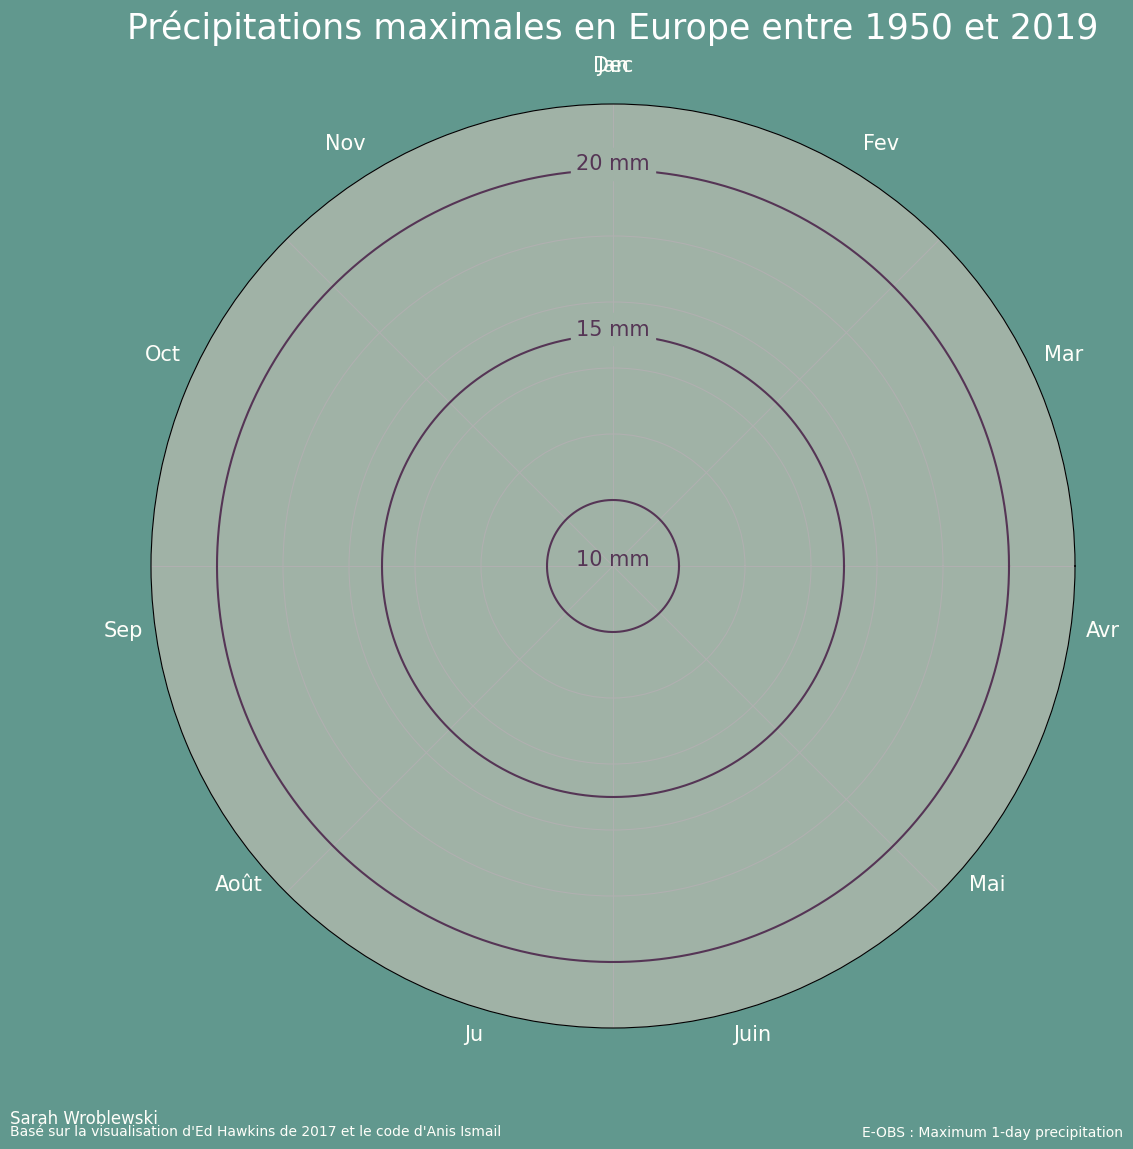

In [41]:

full_circle_thetas=np.linspace(0,2*np.pi,1000)
blue_one_radii=[9+1.0]*1000
red_one_radii=[14+1.0]*1000
red_two_radii=[19+1.0]*1000

# Création de la figure
fig=plt.figure(figsize=(12,12)) 
ax1=plt.subplot(111,projection="polar")  # projection = "polar" nous sert à avoir cette vue zénithale de la donnée

# Tracer un cercle en fonction de full_circle_thetas et un radius x : montre le nombre de mm
ax1.plot(full_circle_thetas, blue_one_radii, c='#553555') 
ax1.plot(full_circle_thetas, red_one_radii, c='#553555')
ax1.plot(full_circle_thetas, red_two_radii, c='#553555')
fig.set_facecolor("#61988E")
ax1.set_facecolor("#A0B2A6")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(8, 22)
ax1.text(np.pi/2, 8, "10 mm", color="#553555", ha='center', fontsize= 15)
ax1.text(np.pi/2, 15, "15 mm", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#A0B2A6', edgecolor='#A0B2A6'))
ax1.text(np.pi/2, 20, "20 mm", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#A0B2A6', edgecolor='#A0B2A6'))

# Donner un titre 
ax1.text(np.pi/2,24,"Précipitations maximales en Europe entre 1950 et 2019",color="white",ha='center',fontsize=25) 

# Ajouter du texte

fig.text(0.72,0.02,"E-OBS : Maximum 1-day precipitation",color="#FFFFFA",fontsize=10)
fig.text(0.01,0.03,"Sarah Wroblewski",color="#FFFFFA",fontsize=12)
fig.text(0.01,0.02,"Basé sur la visualisation d'Ed Hawkins de 2017 et le code d'Anis Ismail",color="#FFFFFA",fontsize=10)

# Ajouter les mois
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,12) # pour poser les valeurs sur un cercle
months=["Jan","Fev","Mar","Avr","Mai","Juin","Ju","Août","Sep","Oct","Nov","Dec"]
for i, month in enumerate(months):
  ax1.text(months_angles[i],23,month,color="#FFFFFA",fontsize=15,ha="center") # les poser sur le cercle

# Ajouter les valeurs 
theta=np.linspace(0,2*np.pi,13) # pour poser les valeurs sur un cercle
years=df_precipitations_s["year"].unique()
def update(i):
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    r = df_precipitations_s[df_precipitations_s['year'] == year]['value'] 
    ax1.plot(theta, r, c=cmap(i*2))
    #ax1.text(2, 24, year,fontsize=20,color="white")
    return ax1

# Create your animation using FuncAnimation
animation = FuncAnimation(fig, update,  frames=len(years),interval=100,repeat=False, blit=False)

# Set the file name and extension (e.g., gif)
file_name = '/home/samsarah/Documents/dataviz/test.gif'

# Save the animation as a GIF with good quality
animation.save('/home/samsarah/Documents/dataviz/test.gif', writer='Pillow',fps=2, dpi=100, codec ="mpeg4", bitrate= -1) # Set the DPI (dots per inch) for better quality

# Close the plot
plt.close()

In [8]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/samsarah/anaconda3/envs/sigma/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'

## Gif violet

In [ ]:
from matplotlib.animation import FuncAnimation
from PIL import Image

full_circle_thetas=np.linspace(0,2*np.pi,1000)
blue_one_radii=[9+1.0]*1000
red_one_radii=[14+1.0]*1000
red_two_radii=[19+1.0]*1000

# Création de la figure
fig=plt.figure(figsize=(12,12)) 
ax1=plt.subplot(111,projection="polar")  # projection = "polar" nous sert à avoir cette vue zénithale de la donnée

# Tracer un cercle en fonction de full_circle_thetas et un radius x : montre le nombre de mm
ax1.plot(full_circle_thetas, blue_one_radii, c='#553555') 
ax1.plot(full_circle_thetas, red_one_radii, c='#553555')
ax1.plot(full_circle_thetas, red_two_radii, c='#553555')
fig.set_facecolor("#553555")
ax1.set_facecolor("#755B69")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(8, 22)
ax1.text(np.pi/2, 8, "10 mm", color="#553555", ha='center', fontsize= 15)
ax1.text(np.pi/2, 15, "15 mm", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#755B69', edgecolor='#755B69'))
ax1.text(np.pi/2, 20, "20 mm", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#755B69', edgecolor='#755B69'))

# Donner un titre 
ax1.text(np.pi/2,24,"Précipitations maximales en Europe entre 1950 et 2019",color="white",ha='center',fontsize=25) 

# Ajouter du texte

fig.text(0.72,0.02,"E-OBS : Maximum 1-day precipitation",color="#FFFFFA",fontsize=10)
fig.text(0.01,0.03,"Sarah Wroblewski",color="#FFFFFA",fontsize=12)
fig.text(0.01,0.02,"Basé sur la visualisation d'Ed Hawkins de 2017 et le code d'Anis Ismail",color="#FFFFFA",fontsize=10)

# Ajouter les mois
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13) # pour poser les valeurs sur un cercle
months=["Jan","Fev","Mar","Avr","Mai","Juin","Ju","Août","Sep","Oct","Nov","Dec"]
for i, month in enumerate(months):
  ax1.text(months_angles[i],23,month,color="#FFFFFA",fontsize=15,ha="center") # les poser sur le cercle

# Ajouter les valeurs 
theta=np.linspace(0,2*np.pi,12) # pour poser les valeurs sur un cercle
years=df_precipitations_s["year"].unique()

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
      if(txt.get_position()==(0,0)):
        txt.set_visible(False)
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    r = df_precipitations_s[df_precipitations_s['year'] == year]['value'] + 1
    ax1.plot(theta, r, c=cmap(i*2))
    #ax1.text(2, 24, year,fontsize=20,color="white")
    return ax1

# Create your animation using FuncAnimation
animation = FuncAnimation(fig, update,  frames=len(years),interval=100,repeat=False, blit=False)

# Set the file name and extension (e.g., gif)
file_name = '/home/samsarah/Documents/dataviz/Maximum_violet.gif'

# Save the animation as a GIF with good quality
animation.save(file_name, writer='imagemagick', fps=2, dpi=100) # Set the DPI (dots per inch) for better quality

# Close the plot
plt.close()

In [49]:
import imageio

# Charger le fichier GIF
file_path = "/home/samsarah/Documents/dataviz/Maximum_violet.gif"
gif = imageio.get_reader(file_path)

# Créer un écrivain pour enregistrer le nouveau GIF
output_file_path = "/home/samsarah/Documents/dataviz/Maximum_violet.gif"
output_gif = imageio.get_writer(output_file_path, duration=gif.get_meta_data()['duration'])

# Parcourir chaque image du GIF
for frame in gif:
    # Ici, vous pouvez effectuer des modifications sur chaque frame
    # Par exemple, appliquer un filtre, redimensionner, changer la couleur, etc.
    # Assurez-vous que chaque frame est une image au format numpy array
        # Ajouter la frame modifiée à l'écrivain de sortie
    output_gif.append_data(frame)

# Fermer l'écrivain
output_gif.close()

print("Le nouveau GIF a été sauvegardé avec succès.")


ValueError: Could not find a backend to open `/home/samsarah/Documents/dataviz/Maximum_violet.gif`` with iomode `r?`.
Based on the extension, the following plugins might add capable backends:
  pyav:  pip install imageio[pyav]

In [ ]:
t0 = ax1.text(6.6, 20, "\n\n     Les données HadCRUT 4.6 sont des données de températures du sol  \
        \n      produites par le HadleyCenter en coopération avec le CRU (Climate research Unit).\
         \n     Analysées grâce à des données de station au sol et des satellites, \
         \n     cette donnée est la combinaison pondérée entre HadSST et CRUTEM, \
         \n     nous informant respectivement sur les températures de la surface \
         \n     de l'eau et de l'air au dessus des terres.\n\n", size = 12, va="baseline", ha="left", multialignment="left", color='#BFC0C0')
t0.set_bbox(dict(facecolor='#637492',  edgecolor='#BFC0C0',boxstyle='round4'))

#2D3142
t = ax1.text(6.2, 20," \n\n  Les écarts de température du sol à la moyenne permettent de mettre en évidence :  \
         \n     - les évènements climatiques extrêmes (hors-normes), \
         \n     - l'évolution des températures par rapport à une année de référence \
         \n     - et cela.\n\n", size=12,va="baseline", ha="left", multialignment="left", bbox=dict(fc="none"), color='#011638')
t.set_bbox(dict(facecolor='#BFC0C0',  edgecolor='#4F5D75',boxstyle='round4'))

t2 = ax1.text(12,22, "\n\
          \n    Ce graphique révèle alors tous les écarts à la moyenne par mois entre 1850 jusqu'à 2020. \
          \n    On peut déjà noter que la tendance globale va vers un réchauffement avec une augmentation \
          \n    de la température atteignant les 1.25°C au dessus de la moyenne.\
          \n    On peut y voir la trace de la seconde guerre mondiale et de ces explosions.\
          \n    Cette augmentation accélère avec un écart au dessus de la moyenne\
          \n    constant depuis 1995. Cette réalité semble particulièrement probante pour les mois\
          \n    d'hiver, qui enregistre les plus grands écarts.\
          \n\n     "
              , size=12,
         va="baseline", ha="left", multialignment="left", color='#BFC0C0')

t2.set_bbox(dict(facecolor='#4F5D75',  edgecolor='#BFC0C0',boxstyle='round4'))

## Violet

In [21]:
np.max(df_precipitations_s["value"])
np.min(df_precipitations_s["value"])

3258.900146484375

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

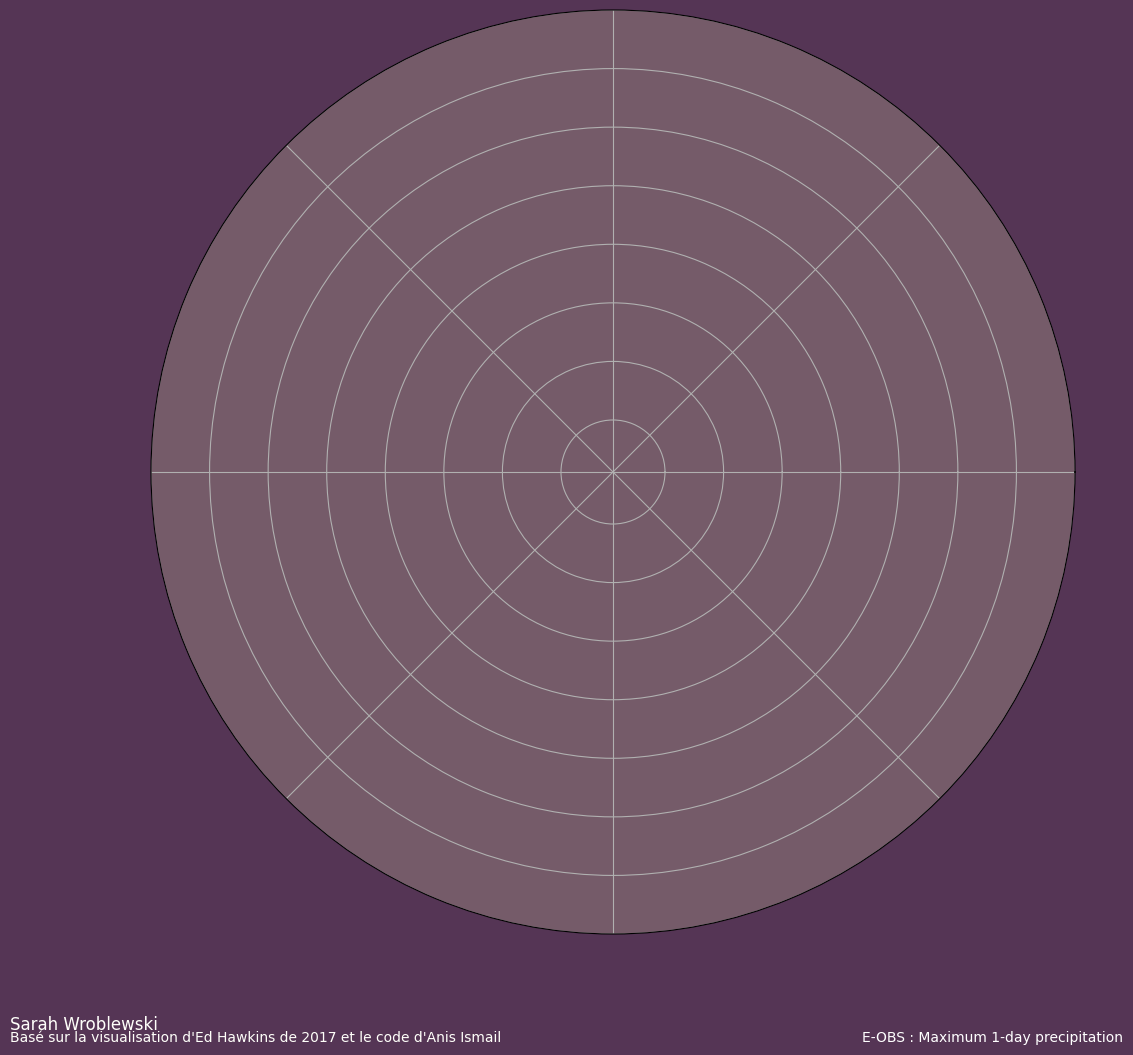

In [22]:
full_circle_thetas=np.linspace(0,2*np.pi,1000)
blue_one_radii=[10+1.0]*1000
red_one_radii=[15+1.0]*1000
red_two_radii=[20+1.0]*1000

# Création de la figure
fig=plt.figure(figsize=(12,12)) 
ax1=plt.subplot(111,projection="polar")  # projection = "polar" nous sert à avoir cette vue zénithale de la donnée

# Tracer un cercle en fonction de full_circle_thetas et un radius x : montre le nombre de mm
ax1.plot(full_circle_thetas, blue_one_radii, c='#553555') 
ax1.plot(full_circle_thetas, red_one_radii, c='#553555')
ax1.plot(full_circle_thetas, red_two_radii, c='#553555')
fig.set_facecolor("#553555")
ax1.set_facecolor("#755B69")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(56, 4000)
ax1.text(np.pi/2, 11, "11 mm", color="#553555", ha='center', fontsize= 15)
ax1.text(np.pi/2, 16, "16 mm", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#755B69', edgecolor='#755B69'))
ax1.text(np.pi/2, 21, "21 mm", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#755B69', edgecolor='#755B69'))

# Donner un titre 
ax1.text(np.pi/2,24,"Précipitations maximales en Europe entre 1950 et 2019",color="white",ha='center',fontsize=25) 

# Ajouter du texte

fig.text(0.72,0.02,"E-OBS : Maximum 1-day precipitation",color="white",fontsize=10)
fig.text(0.01,0.03,"Sarah Wroblewski",color="#FFFFFA",fontsize=12)
fig.text(0.01,0.02,"Basé sur la visualisation d'Ed Hawkins de 2017 et le code d'Anis Ismail",color="#FFFFFA",fontsize=10)

# Ajouter les mois
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13) # pour poser les valeurs sur un cercle
months=["Jan","Fev","Mar","Avr","Mai","Juin","Ju","Août","Sep","Oct","Nov","Dec"]
for i, month in enumerate(months):
  ax1.text(months_angles[i],23,month,color="white",fontsize=15,ha="center") # les poser sur le cercle

# Ajouter les valeurs 
theta=np.linspace(0,2*np.pi,12) # pour poser les valeurs sur un cercle
years=df_precipitations_s["year"].unique()
for index,year in enumerate(years):
  r=df_precipitations_s.loc[df_precipitations_s["year"]==year,"value"]+1 # récupérer les valeurs
  ax1.plot(theta,r,c=cmap(index)) # les poser sur un cercle

"""
  r=r.reset_index()
  if np.take(theta, index) is not None and r.loc[index, "value"] is not None:      
    midpoint_angle = (np.take(theta, index) + np.take(theta, (index + 1) % len(theta))) / 2
    ax1.text(midpoint_angle, r.loc[index, "value"] + 1, str(year), color="#553555", ha='center', fontsize=8)

"""

# Montrer la figure avec un tight_layout()
plt.tight_layout()
plt.show()


# Nombre de jours de précipitations au dessus du 90 percentile

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'sis-european-risk-extreme-precipitation-indicators',
    {
        'format': 'zip',
        'spatial_coverage': 'europe',
        'variable': 'number_of_precipitation_days_exceeding_fixed_percentiles',
        'temporal_aggregation': 'monthly',
        'percentile': '90th',
        'period': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019',
        ],
        'product_type': 'era5',
    },
    '/home/samsarah/Documents/dataviz/extreme_precipitation_indicators.zip')

## Formatter

In [67]:
frames=[]
files = '/home/samsarah/Documents/dataviz/extreme_precipitation_indicators'
for file in os.listdir(files):
    precip_nc_file = os.path.join(files, file)
    nc = netCDF4.Dataset(precip_nc_file, mode='r')
    #print(nc.variables.keys())
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    time_var = nc.variables['time']
    dtime = netCDF4.num2date(time_var[:],time_var.units)
    r90pday = nc.variables['r90pday'][:]
    #print("La donnée sur", r90pday.shape[0], "mois avec une image de forme ", r90pday.shape[1], "par ", r90pday.shape[2])
    moyenne_par_mois = r90pday.mean(axis=(1, 2)) # permet d'enlever la dimension géographique pour n'avoir qu'une donnée pour l'Europe en faisant une moyenne sur l'axe 1 et 2 en même temps
    #print("Notre donnée a maintenant une moyenne par mois avec seulement", moyenne_par_mois.shape, "dimension")
    months=[]
    year=[]
    for i in range(1,13):
        months.append(i)
        year.append(precip_nc_file.split('_')[-2])
        #print(precip_nc_file.split('_')[-2], "en cours!")
    df_en_cours = pd.DataFrame({"year":year, "month":months,"value":moyenne_par_mois.data})
    if not df_en_cours.empty:
            frames.append(df_en_cours)
            df_precipitations = pd.concat(frames)
df_precipitations_s = df_precipitations.sort_values(['year', 'month'],
              ascending = [True, True]) # mettre les données dans l'ordre chronologique selon deux colonnes
df_precipitations_s.reset_index(inplace=True)

## Vert

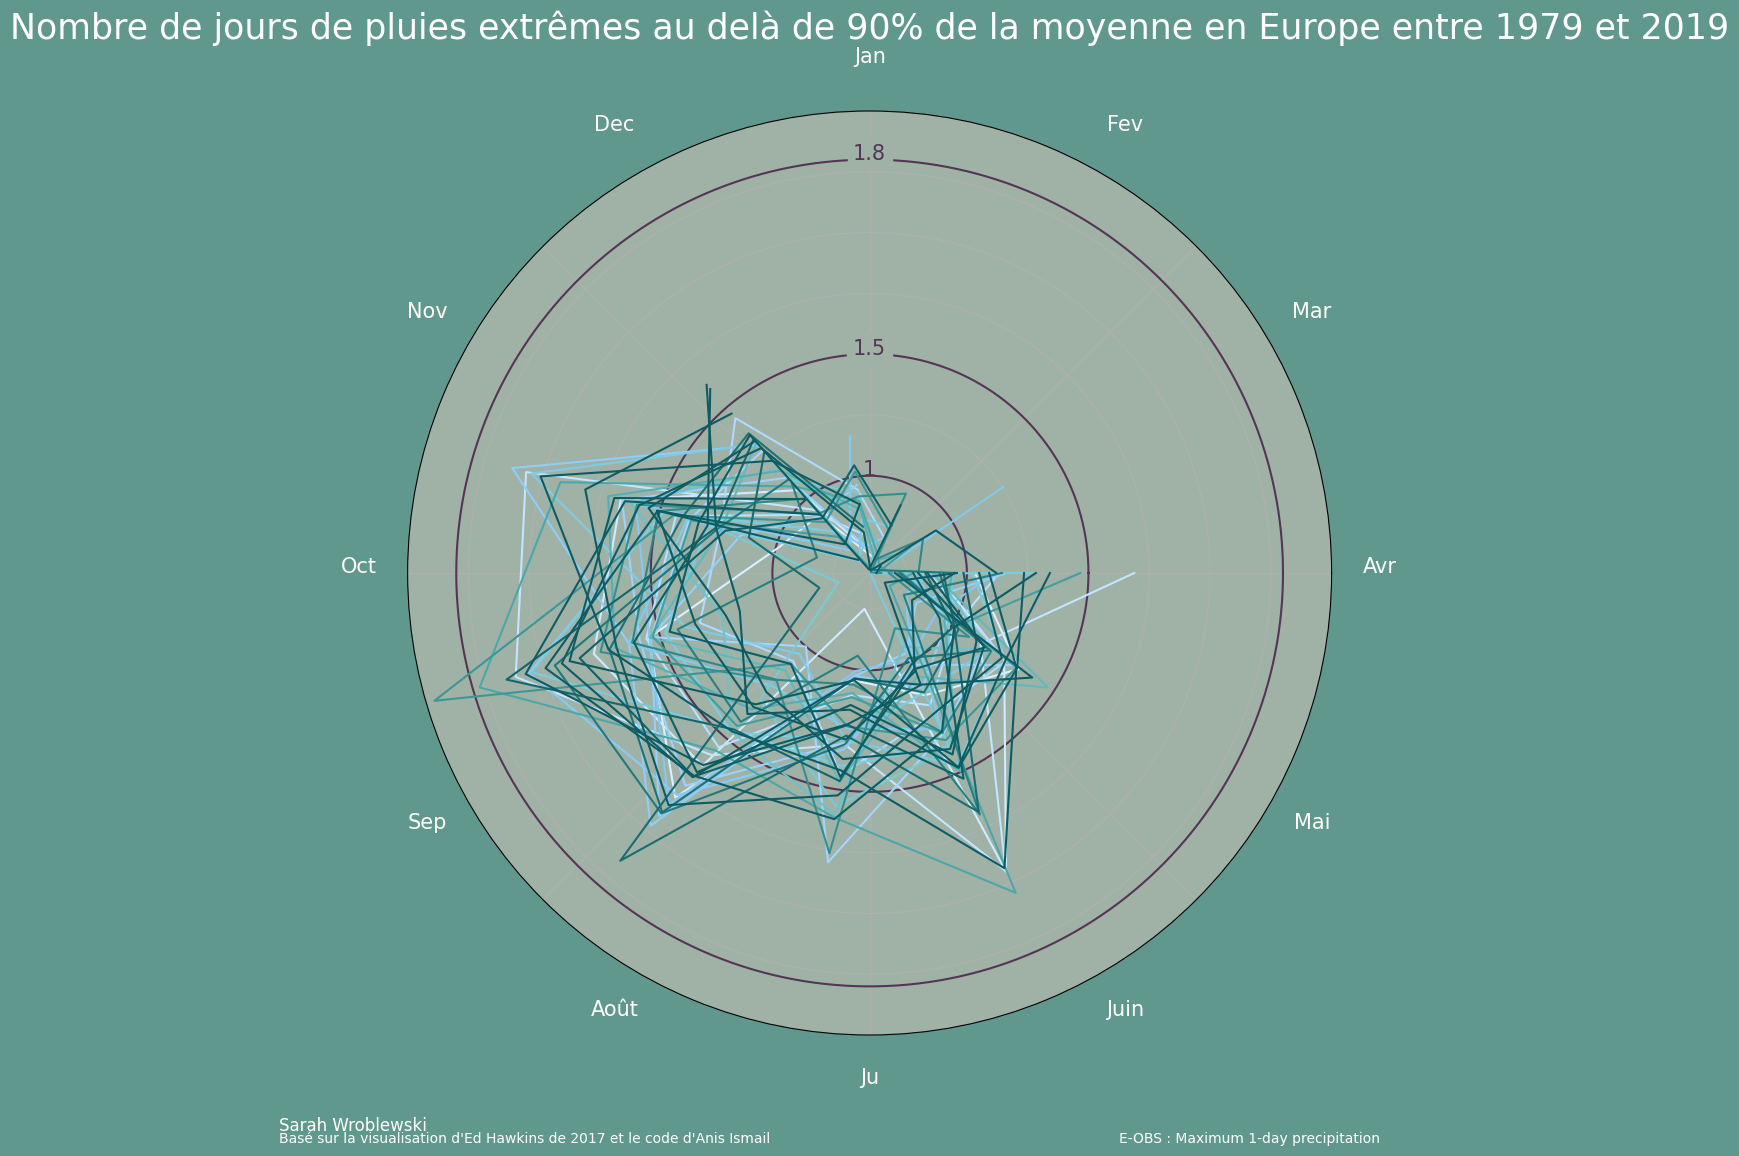

In [73]:
full_circle_thetas=np.linspace(0,2*np.pi,1500)
blue_one_radii=[0.5]*1500
red_one_radii=[1]*1500
red_two_radii=[1.8]*1500

# Création de la figure
fig=plt.figure(figsize=(12,12)) 
ax1=plt.subplot(111,projection="polar")  # projection = "polar" nous sert à avoir cette vue zénithale de la donnée

# Tracer un cercle en fonction de full_circle_thetas et un radius x : montre le nombre de mm
ax1.plot(full_circle_thetas, blue_one_radii, c='#553555') 
ax1.plot(full_circle_thetas, red_one_radii, c='#553555')
ax1.plot(full_circle_thetas, red_two_radii, c='#553555')
fig.set_facecolor("#61988E")
ax1.set_facecolor("#A0B2A6")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0.1, 2)

ax1.text(np.pi/2, 0.5, "1", color="#553555", ha='center', fontsize= 15)
ax1.text(np.pi/2, 1, "1.5", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#A0B2A6', edgecolor='#A0B2A6'))
ax1.text(np.pi/2, 1.8, "1.8", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#A0B2A6', edgecolor='#A0B2A6'))


# Donner un titre 
ax1.text(np.pi/2,2.3,"Nombre de jours de pluies extrêmes au delà de 90% de la moyenne en Europe entre 1979 et 2019",color="white",ha='center',fontsize=25) 

# Ajouter du texte

fig.text(0.72,0.02,"E-OBS : Maximum 1-day precipitation",color="#FFFFFA",fontsize=10)
fig.text(0.02,0.03,"Sarah Wroblewski",color="#FFFFFA",fontsize=12)
fig.text(0.02,0.02,"Basé sur la visualisation d'Ed Hawkins de 2017 et le code d'Anis Ismail",color="#FFFFFA",fontsize=10)
# Ajouter les mois
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13) # pour poser les valeurs sur un cercle
months=["Jan","Fev","Mar","Avr","Mai","Juin","Ju","Août","Sep","Oct","Nov","Dec"]
for i, month in enumerate(months):
  ax1.text(months_angles[i],2.2,month,color="#FFFFFA",fontsize=15,ha="center") # les poser sur le cercle


# Ajouter les valeurs 
theta=np.linspace(0,2*np.pi,12) # pour poser les valeurs sur un cercle
years=df_precipitations_s["year"].unique()
for index,year in enumerate(years):
  r=df_precipitations_s.loc[df_precipitations_s["year"]==year,"value"]-0.6 # récupérer les valeurs
  ax1.plot(theta,r,c=cmap(index*2)) # les poser sur un cercle

# Montrer la figure avec un tight_layout()
plt.show()


# Au dessus de 20 mm

In [332]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'sis-european-risk-extreme-precipitation-indicators',
    {
        'format': 'zip',
        'spatial_coverage': 'europe',
        'product_type': 'e_obs',
        'variable': 'number_of_precipitation_days_exceeding_20mm',
        'temporal_aggregation': 'monthly',
        'period': [
            '1950', '1951', '1952',
            '1953', '1954', '1955',
            '1956', '1957', '1958',
            '1959', '1960', '1961',
            '1962', '1963', '1964',
            '1965', '1966', '1967',
            '1968', '1969', '1970',
            '1971', '1972', '1973',
            '1974', '1975', '1976',
            '1977', '1978', '1979',
            '1980', '1981', '1982',
            '1983', '1984', '1985',
            '1986', '1987', '1988',
            '1989', '1990', '1991',
            '1992', '1993', '1994',
            '1995', '1996', '1997',
            '1998', '1999', '2000',
            '2001', '2002', '2003',
            '2004', '2005', '2006',
            '2007', '2008', '2009',
            '2010', '2011', '2012',
            '2013', '2014', '2015',
            '2016', '2017', '2018',
            '2019',
        ],
    },
    '/home/samsarah/Documents/dataviz/number_of_precipitation_days_exceeding_20mm.zip')

2024-02-05 15:59:55,773 INFO Welcome to the CDS
2024-02-05 15:59:55,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-european-risk-extreme-precipitation-indicators
2024-02-05 15:59:55,882 INFO Request is queued
2024-02-05 15:59:56,920 INFO Request is running
2024-02-05 16:00:45,486 INFO Request is completed
2024-02-05 16:00:45,487 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/dataset-sis-european-risk-extreme-precipitation-indicators-d69bd6a4-be6d-4f1f-ba60-a36914a9198b.zip to /home/samsarah/Documents/dataviz/number_of_precipitation_days_exceeding_20mm.zip (14.7M)
2024-02-05 16:00:46,753 INFO Download rate 11.7M/s  


Result(content_length=15464491,content_type=application/zip,location=https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/dataset-sis-european-risk-extreme-precipitation-indicators-d69bd6a4-be6d-4f1f-ba60-a36914a9198b.zip)

## Formatter

In [62]:
frames=[]
files = '/home/samsarah/Documents/dataviz/number_of_precipitation_days_exceeding_20mm'
for file in os.listdir(files):
    precip_nc_file = os.path.join(files, file)
    nc = netCDF4.Dataset(precip_nc_file, mode='r')
  #  print(nc.variables.keys())
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    time_var = nc.variables['time']
    dtime = netCDF4.num2date(time_var[:],time_var.units)
    r90pday = nc.variables['rr20mm'][:]
   # print("La donnée sur", r90pday.shape[0], "mois avec une image de forme ", r90pday.shape[1], "par ", r90pday.shape[2])
    moyenne_par_mois = r90pday.mean(axis=(1, 2)) # permet d'enlever la dimension géographique pour n'avoir qu'une donnée pour l'Europe en faisant une moyenne sur l'axe 1 et 2 en même temps
   # print("Notre donnée a maintenant une moyenne par mois avec seulement", moyenne_par_mois.shape, "dimension")
    months=[]
    year=[]
    for i in range(1,13):
        months.append(i)
        year.append(precip_nc_file.split('_')[-2])
       # print(precip_nc_file.split('_')[-2], "en cours!")
    df_en_cours = pd.DataFrame({"year":year, "month":months,"value":moyenne_par_mois.data})
    if not df_en_cours.empty:
            frames.append(df_en_cours)
            df_precipitations = pd.concat(frames)
df_precipitations_s = df_precipitations.sort_values(['year', 'month'],
              ascending = [True, True]) # mettre les données dans l'ordre chronologique selon deux colonnes
df_precipitations_s.reset_index(inplace=True)

## Vert

In [85]:
full_circle_thetas=np.linspace(0,2*np.pi,1500)
blue_one_radii=[1 + 1]*1500
red_one_radii=[2 +1]*1500
red_two_radii=[3 +1]*1500

# Création de la figure
fig=plt.figure(figsize=(12,12)) 
ax1=plt.subplot(111,projection="polar")  # projection = "polar" nous sert à avoir cette vue zénithale de la donnée

# Tracer un cercle en fonction de full_circle_thetas et un radius x : montre le nombre de mm
ax1.plot(full_circle_thetas, blue_one_radii, c='#553555') 
ax1.plot(full_circle_thetas, red_one_radii, c='#553555')
ax1.plot(full_circle_thetas, red_two_radii, c='#553555')
fig.set_facecolor("#61988E")
ax1.set_facecolor("#A0B2A6")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(1, 4)

ax1.text(np.pi/2, 2, "1 jour", color="#553555", ha='center', fontsize= 15)
ax1.text(np.pi/2, 3, "2 jours", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#A0B2A6', edgecolor='#A0B2A6'))
ax1.text(np.pi/2, 3.8, "3 jours", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#A0B2A6', edgecolor='#A0B2A6'))

# Donner un titre 
ax1.text(np.pi/2,4.5, "Nombre de jours de précipitations excédents 20 mm",color="white",ha='center',fontsize=25) 
ax1.text(np.pi/2,4.3, "en Europe entre 1950 et 2019",color="white",ha='center',fontsize=10) 

# Ajouter du texte

fig.text(0.72,0.02,"E-OBS : Number of days exceeding 20mm",color="#FFFFFA",fontsize=10)
fig.text(0.02,0.03,"Sarah Wroblewski",color="#FFFFFA",fontsize=12)
fig.text(0.02,0.02,"Basé sur la visualisation d'Ed Hawkins de 2017 et le code d'Anis Ismail",color="#FFFFFA",fontsize=10)
# Ajouter les mois
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13) # pour poser les valeurs sur un cercle
months=["Jan","Fev","Mar","Avr","Mai","Juin","Ju","Août","Sep","Oct","Nov","Dec"]
for i, month in enumerate(months):
  ax1.text(months_angles[i],4.1,month,color="#FFFFFA",fontsize=15,ha="center") # les poser sur le cercle

# Ajouter les valeurs 
theta=np.linspace(0,2*np.pi,12) # pour poser les valeurs sur un cercle
years=df_precipitations_s["year"].unique()

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
      if(txt.get_position()==(0,0)):
        txt.set_visible(False)
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    r = df_precipitations_s[df_precipitations_s['year'] == year]['value'] + 1
    ax1.plot(theta, r, c=cmap(i*2))
    #ax1.text(2, 24, year,fontsize=20,color="white")
    return ax1

# Create your animation using FuncAnimation
animation = FuncAnimation(fig, update,  frames=len(years),interval=100,repeat=False, blit=False)

# Set the file name and extension (e.g., gif)
file_name = '/home/samsarah/Documents/dataviz/20mm_green.gif'

# Save the animation as a GIF with good quality
animation.save(file_name, writer='imagemagick', fps=2, dpi=100) # Set the DPI (dots per inch) for better quality

# Close the plot
plt.close()

## Violet

In [86]:
full_circle_thetas=np.linspace(0,2*np.pi,1500)
blue_one_radii=[1 + 1]*1500
red_one_radii=[2 +1]*1500
red_two_radii=[3 +1]*1500

# Création de la figure
fig=plt.figure(figsize=(12,12)) 
ax1=plt.subplot(111,projection="polar")  # projection = "polar" nous sert à avoir cette vue zénithale de la donnée

# Tracer un cercle en fonction de full_circle_thetas et un radius x : montre le nombre de mm
ax1.plot(full_circle_thetas, blue_one_radii, c='#553555') 
ax1.plot(full_circle_thetas, red_one_radii, c='#553555')
ax1.plot(full_circle_thetas, red_two_radii, c='#553555')
fig.set_facecolor("#553555")
ax1.set_facecolor("#755B69")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(1, 4)

ax1.text(np.pi/2, 2, "1 jour", color="#553555", ha='center', fontsize= 15)
ax1.text(np.pi/2, 3, "2 jours", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#755B69', edgecolor='#755B69'))
ax1.text(np.pi/2, 3.8, "3 jours", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#755B69', edgecolor='#755B69'))

# Donner un titre 
ax1.text(np.pi/2,4.5, "Nombre de jours de précipitations excédents 20 mm",color="white",ha='center',fontsize=25) 
ax1.text(np.pi/2,4.3, "en Europe entre 1950 et 2019",color="white",ha='center',fontsize=10) 

# Ajouter du texte

fig.text(0.72,0.02,"E-OBS : Number of days exceeding 20mm",color="#FFFFFA",fontsize=10)
fig.text(0.02,0.03,"Sarah Wroblewski",color="#FFFFFA",fontsize=12)
fig.text(0.02,0.02,"Basé sur la visualisation d'Ed Hawkins de 2017 et le code d'Anis Ismail",color="#FFFFFA",fontsize=10)
# Ajouter les mois
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13) # pour poser les valeurs sur un cercle
months=["Jan","Fev","Mar","Avr","Mai","Juin","Ju","Août","Sep","Oct","Nov","Dec"]
for i, month in enumerate(months):
  ax1.text(months_angles[i],4.1,month,color="#FFFFFA",fontsize=15,ha="center") # les poser sur le cercle

# Ajouter les valeurs 
theta=np.linspace(0,2*np.pi,12) # pour poser les valeurs sur un cercle
years=df_precipitations_s["year"].unique()

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
      if(txt.get_position()==(0,0)):
        txt.set_visible(False)
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    r = df_precipitations_s[df_precipitations_s['year'] == year]['value'] + 1
    ax1.plot(theta, r, c=cmap(i*2))
    #ax1.text(2, 24, year,fontsize=20,color="white")
    return ax1

# Create your animation using FuncAnimation
animation = FuncAnimation(fig, update,  frames=len(years),interval=100,repeat=False, blit=False)

# Set the file name and extension (e.g., gif)
file_name = '/home/samsarah/Documents/dataviz/20mm_violet.gif'

# Save the animation as a GIF with good quality
animation.save(file_name, writer='imagemagick', fps=2, dpi=100) # Set the DPI (dots per inch) for better quality

# Close the plot
plt.close()

# Wet days

In [383]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'sis-european-risk-extreme-precipitation-indicators',
    {
        'format': 'zip',
        'spatial_coverage': 'europe',
        'product_type': 'e_obs',
        'variable': 'number_of_wet_days',
        'temporal_aggregation': 'monthly',
        'period': [
            '1950', '1951', '1952',
            '1953', '1954', '1955',
            '1956', '1957', '1958',
            '1959', '1960', '1961',
            '1962', '1963', '1964',
            '1965', '1966', '1967',
            '1968', '1969', '1970',
            '1971', '1972', '1973',
            '1974', '1975', '1976',
            '1977', '1978', '1979',
            '1980', '1981', '1982',
            '1983', '1984', '1985',
            '1986', '1987', '1988',
            '1989', '1990', '1991',
            '1992', '1993', '1994',
            '1995', '1996', '1997',
            '1998', '1999', '2000',
            '2001', '2002', '2003',
            '2004', '2005', '2006',
            '2007', '2008', '2009',
            '2010', '2011', '2012',
            '2013', '2014', '2015',
            '2016', '2017', '2018',
            '2019',
        ],
    },
    '/home/samsarah/Documents/dataviz/number_of_wet_days.zip')

2024-02-05 16:16:00,086 INFO Welcome to the CDS
2024-02-05 16:16:00,088 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-european-risk-extreme-precipitation-indicators
2024-02-05 16:16:00,165 INFO Request is queued
2024-02-05 16:16:01,205 INFO Request is running
2024-02-05 16:16:49,761 INFO Request is completed
2024-02-05 16:16:49,763 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/dataset-sis-european-risk-extreme-precipitation-indicators-8795fc28-ece9-4e26-84d2-dbdc9cc4fc2c.zip to /home/samsarah/Documents/dataviz/number_of_wet_days.zip (40.4M)
2024-02-05 16:16:52,901 INFO Download rate 12.9M/s  


Result(content_length=42393126,content_type=application/zip,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/dataset-sis-european-risk-extreme-precipitation-indicators-8795fc28-ece9-4e26-84d2-dbdc9cc4fc2c.zip)

## Formatter la donnée

In [115]:
frames=[]
files = '/home/samsarah/Documents/dataviz/number_of_wet_days'
for file in os.listdir(files):
    precip_nc_file = os.path.join(files, file)
    nc = netCDF4.Dataset(precip_nc_file, mode='r')
    print(nc.variables.keys())
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    time_var = nc.variables['time']
    dtime = netCDF4.num2date(time_var[:],time_var.units)
    rr1 = nc.variables['rr1'][:]
    print("La donnée sur", rr1.shape[0], "mois avec une image de forme ", rr1.shape[1], "par ", rr1.shape[2])
    moyenne_par_mois = rr1.mean(axis=(1, 2)) # permet d'enlever la dimension géographique pour n'avoir qu'une donnée pour l'Europe en faisant une moyenne sur l'axe 1 et 2 en même temps
    print("Notre donnée a maintenant une moyenne par mois avec seulement", moyenne_par_mois.shape, "dimension")
    months=[]
    year=[]
    for i in range(1,13):
        months.append(i)
        year.append(precip_nc_file.split('_')[-2])
        print(precip_nc_file.split('_')[-2], "en cours!")
    df_en_cours = pd.DataFrame({"year":year, "month":months,"value":moyenne_par_mois.data})
    if not df_en_cours.empty:
            frames.append(df_en_cours)
            df_precipitations = pd.concat(frames)
df_precipitations_s = df_precipitations.sort_values(['year', 'month'],
              ascending = [True, True]) # mettre les données dans l'ordre chronologique selon deux colonnes
df_precipitations_s.reset_index(inplace=True)

dict_keys(['rr1', 'latitude', 'time', 'longitude'])
La donnée sur 12 mois avec une image de forme  360 par  650
Notre donnée a maintenant une moyenne par mois avec seulement (12,) dimension
1988 en cours!
1988 en cours!
1988 en cours!
1988 en cours!
1988 en cours!
1988 en cours!
1988 en cours!
1988 en cours!
1988 en cours!
1988 en cours!
1988 en cours!
1988 en cours!
dict_keys(['rr1', 'latitude', 'time', 'longitude'])
La donnée sur 12 mois avec une image de forme  360 par  650
Notre donnée a maintenant une moyenne par mois avec seulement (12,) dimension
1952 en cours!
1952 en cours!
1952 en cours!
1952 en cours!
1952 en cours!
1952 en cours!
1952 en cours!
1952 en cours!
1952 en cours!
1952 en cours!
1952 en cours!
1952 en cours!
dict_keys(['rr1', 'latitude', 'time', 'longitude'])
La donnée sur 12 mois avec une image de forme  360 par  650
Notre donnée a maintenant une moyenne par mois avec seulement (12,) dimension
1960 en cours!
1960 en cours!
1960 en cours!
1960 en cours!
1960 en co

## Vert 

In [91]:
full_circle_thetas=np.linspace(0,2*np.pi,1500)
blue_one_radii=[5 + 1]*1500
red_one_radii=[10 +1]*1500
red_two_radii=[14 +1]*1500

# Création de la figure
fig=plt.figure(figsize=(12,12)) 
ax1=plt.subplot(111,projection="polar")  # projection = "polar" nous sert à avoir cette vue zénithale de la donnée

# Tracer un cercle en fonction de full_circle_thetas et un radius x : montre le nombre de mm
ax1.plot(full_circle_thetas, blue_one_radii, c='#553555') 
ax1.plot(full_circle_thetas, red_one_radii, c='#553555')
ax1.plot(full_circle_thetas, red_two_radii, c='#553555')
fig.set_facecolor("#61988E")
ax1.set_facecolor("#A0B2A6")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(5, 17)

ax1.text(np.pi/2, 6, "1", color="#553555", ha='center', fontsize= 15)
ax1.text(np.pi/2, 11, "1.5", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#A0B2A6', edgecolor='#A0B2A6'))
ax1.text(np.pi/2, 15, "1.8", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#A0B2A6', edgecolor='#A0B2A6'))

# Donner un titre 
ax1.text(np.pi/2,19, "Nombre de jours de pluie consécutifs en Europe entre 1950 et 2019",color="white",ha='center',fontsize=25) 

# Ajouter du texte

fig.text(0.72,0.02,"E-OBS : Number of wet days",color="#FFFFFA",fontsize=10)
fig.text(0.02,0.03,"Sarah Wroblewski",color="#FFFFFA",fontsize=12)
fig.text(0.02,0.02,"Basé sur la visualisation d'Ed Hawkins de 2017 et le code d'Anis Ismail",color="#FFFFFA",fontsize=10)
# Ajouter les mois
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13) # pour poser les valeurs sur un cercle
months=["Jan","Fev","Mar","Avr","Mai","Juin","Ju","Août","Sep","Oct","Nov","Dec"]
for i, month in enumerate(months):
  ax1.text(months_angles[i],18,month,color="#FFFFFA",fontsize=15,ha="center") # les poser sur le cercle


# Ajouter les valeurs 
theta=np.linspace(0,2*np.pi,12) # pour poser les valeurs sur un cercle
years=df_precipitations_s["year"].unique()

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
      if(txt.get_position()==(0,0)):
        txt.set_visible(False)
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    r = df_precipitations_s[df_precipitations_s['year'] == year]['value'] + 1
    ax1.plot(theta, r, c=cmap(i*2))
    #ax1.text(2, 24, year,fontsize=20,color="white")
    return ax1

# Create your animation using FuncAnimation
animation = FuncAnimation(fig, update,  frames=len(years),interval=100,repeat=False, blit=False)

# Set the file name and extension (e.g., gif)
file_name = '/home/samsarah/Documents/dataviz/wetdays_green.gif'

# Save the animation as a GIF with good quality
animation.save(file_name, writer='imagemagick', fps=2, dpi=100) # Set the DPI (dots per inch) for better quality

# Close the plot
plt.close()

## Violet

In [110]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

/home/samsarah/anaconda3/envs/sigma/lib/python3.10/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [120]:
years

array(['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'], dtype=object)

IndexError: list index out of range

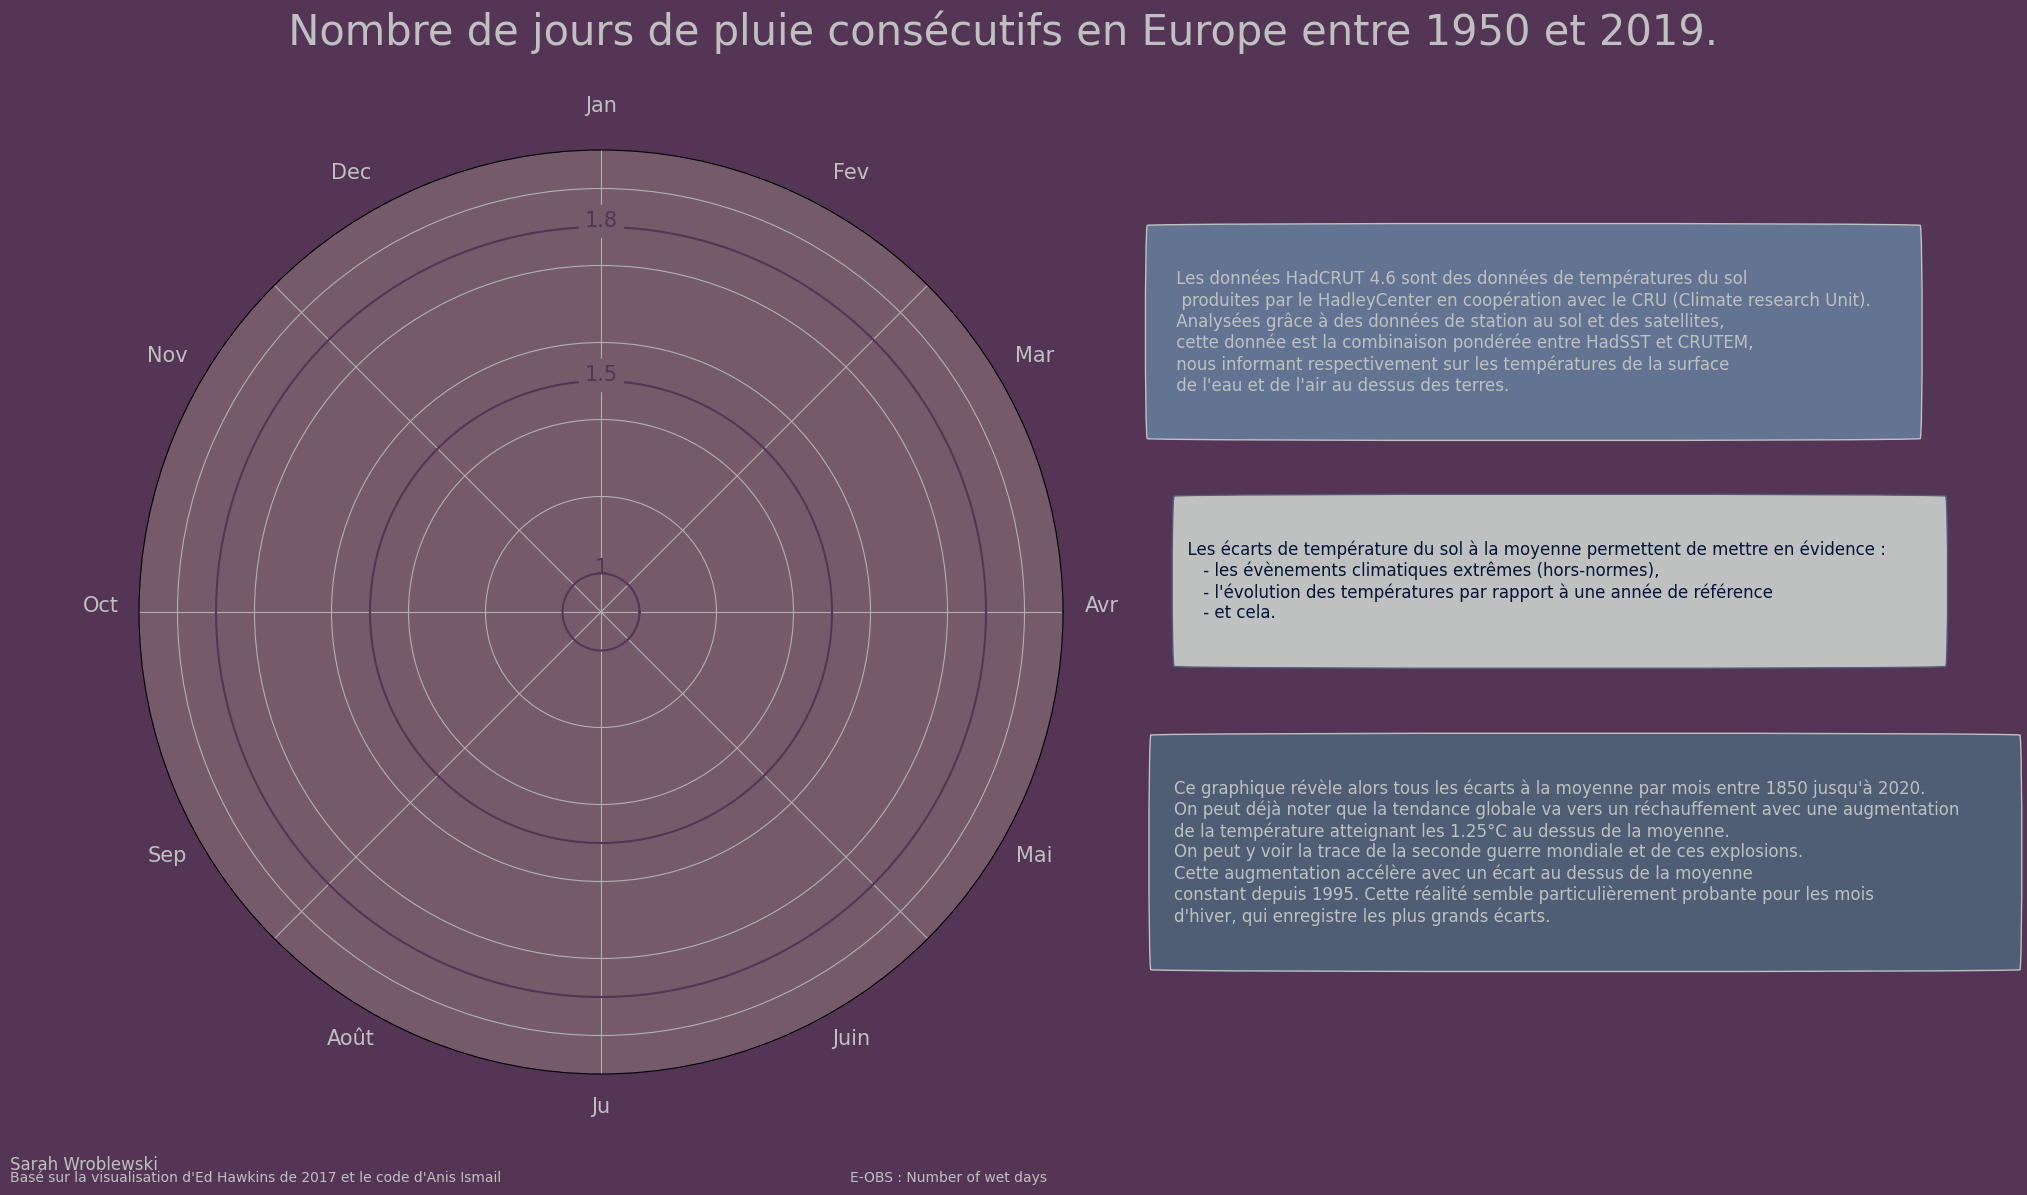

In [121]:
full_circle_thetas=np.linspace(0,2*np.pi,1500)
blue_one_radii=[5 + 1]*1500
red_one_radii=[10 +1]*1500
red_two_radii=[14 +1]*1500

# Création de la figure
fig=plt.figure(figsize=(12,12)) 
ax1=plt.subplot(111,projection="polar")  # projection = "polar" nous sert à avoir cette vue zénithale de la donnée

# Tracer un cercle en fonction de full_circle_thetas et un radius x : montre le nombre de mm
ax1.plot(full_circle_thetas, blue_one_radii, c='#553555') 
ax1.plot(full_circle_thetas, red_one_radii, c='#553555')
ax1.plot(full_circle_thetas, red_two_radii, c='#553555')
fig.set_facecolor("#553555")
ax1.set_facecolor("#755B69")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(5, 17)

ax1.text(np.pi/2, 6, "1", color="#553555", ha='center', fontsize= 15)
ax1.text(np.pi/2, 11, "1.5", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#755B69', edgecolor='#755B69'))
ax1.text(np.pi/2, 15, "1.8", color="#553555", ha='center', fontsize= 15,bbox=dict(facecolor='#755B69', edgecolor='#755B69'))


# Ajoutez des titres et des labels
plt.title(' Nombre de jours de pluie consécutifs en Europe entre 1950 et 2019.\
          \n\n', y = 1, x= 1,ha='center',fontsize=30, color='#BFC0C0')
# Ajouter du texte

fig.text(0.72,0.02,"E-OBS : Number of wet days",color="#BFC0C0",fontsize=10)
fig.text(0.02,0.03,"Sarah Wroblewski",color="#BFC0C0",fontsize=12)
fig.text(0.02,0.02,"Basé sur la visualisation d'Ed Hawkins de 2017 et le code d'Anis Ismail",color="#BFC0C0",fontsize=10)

# Ajouter les mois
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13) # pour poser les valeurs sur un cercle
months=["Jan","Fev","Mar","Avr","Mai","Juin","Ju","Août","Sep","Oct","Nov","Dec"]
for i, month in enumerate(months):
  ax1.text(months_angles[i],18,month,color="#BFC0C0",fontsize=15,ha="center") # les poser sur le cercle


# Ajouter les valeurs 
theta=np.linspace(0,2*np.pi,12) # pour poser les valeurs sur un cercle
years=df_precipitations_s["year"].unique()

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
      if(txt.get_position()==(0,0)):
        txt.set_visible(False)
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    r = df_precipitations_s[df_precipitations_s['year'] == year]['value'] 
    ax1.plot(theta, r, c=cmap(i*2))
    #ax1.text(2, 24, year,fontsize=20,color="white")
    return ax1
     
# Create your animation using FuncAnimation
animation = FuncAnimation(fig, update,  frames=len(years),interval=100,repeat=False)

# Set the file name and extension (e.g., gif)
file_name = '/home/samsarah/Documents/dataviz/wetdays_violet_text.gif'
writer = PillowWriter(fps=12)
animation.save(file_name, writer=writer)

# Save the animation as a GIF with good quality
animation.save(file_name, writer='imagemagick') # Set the DPI (dots per inch) for better quality

# Close the plot
plt.close()